In [1]:
import sys
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("../gotmtool")
from gotmtool import *

In [2]:
dataroot = '../case2'
filename = 'SD_argo_Feb.mat'

In [3]:
dat = sio.loadmat(os.path.join(dataroot, filename))

In [4]:
year = 2019
doy = 38
dttime_pfl = [pd.to_datetime(year*1000 + doy, format='%Y%j')]
dttime_pfl

[Timestamp('2019-02-07 00:00:00')]

In [5]:
dat['SD_argo_Feb']

array([[(array([[-53.25525   , -53.18731   , -53.12722   , -52.96056   ,
                -52.71153   , -52.42475   , -52.57976   , -53.2618    ,
                -53.078     , -52.04541   , -51.88612   , -52.969     ,
                -52.73430698, -51.52584   , -51.26459   , -52.371     ,
                -52.502     , -51.39454   , -52.14      , -52.241     ,
                -51.945     , -52.05      , -51.727     , -51.832     ,
                -51.575     , -51.644     , -51.407     , -51.494     ,
                -51.254     , -51.327     , -51.135     , -51.189     ,
                -51.042     , -51.091     , -51.91709   ]]), array([[-147.42546   , -147.27988   , -147.21478   , -147.14483   ,
                -147.10628   , -147.04253   , -147.07332   , -145.45321   ,
                -147.235     , -146.97149   , -146.8757    , -147.203     ,
                -147.14972921, -146.55955   , -146.32334   , -147.105     ,
                -147.097     , -146.43172   , -147.02      , -147.

In [6]:
lat  = dat['SD_argo_Feb'][0,0]['lat']
lon  = dat['SD_argo_Feb'][0,0]['lon']
pre  = dat['SD_argo_Feb'][0,0]['pre']
temp = dat['SD_argo_Feb'][0,0]['temp']
salt = dat['SD_argo_Feb'][0,0]['sal']

In [7]:
lat[0,0]

-53.25525

In [8]:
nzmax = 500
idx = 3 # warm
z1 = pre[:nzmax,idx].squeeze()
t1 = temp[:nzmax,idx:idx+1].transpose()
s1 = salt[:nzmax,idx:idx+1].transpose()
print(z1.shape)
print(t1.shape)
print(s1.shape)
dat_dump_pfl(dttime_pfl, z1, [t1], os.path.join(dataroot, 't_prof{}.dat'.format(idx+1)), skip_value=np.nan)
dat_dump_pfl(dttime_pfl, z1, [s1], os.path.join(dataroot, 's_prof{}.dat'.format(idx+1)), skip_value=np.nan)

(500,)
(1, 500)
(1, 500)


In [9]:
nzmax = 500
idx = 7 # cold
z2 = pre[:nzmax,idx].squeeze()
t2 = temp[:nzmax,idx:idx+1].transpose()
s2 = salt[:nzmax,idx:idx+1].transpose()
print(z2.shape)
print(t2.shape)
print(s2.shape)
dat_dump_pfl(dttime_pfl, z2, [t2], os.path.join(dataroot, 't_prof{}.dat'.format(idx+1)), skip_value=np.nan)
dat_dump_pfl(dttime_pfl, z2, [s2], os.path.join(dataroot, 's_prof{}.dat'.format(idx+1)), skip_value=np.nan)

(500,)
(1, 500)
(1, 500)


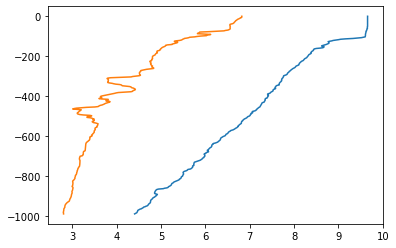

In [10]:
plt.plot(t1.squeeze(), z1)
plt.plot(t2.squeeze(), z2)

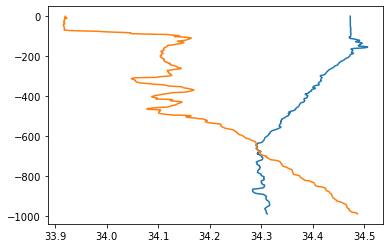

In [11]:
plt.plot(s1.squeeze(), z2)
plt.plot(s2.squeeze(), z2)